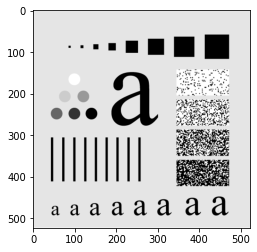

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftfreq, fftshift

img = plt.imread('Imgs/test_image.tiff')
plt.imshow(img, 'gray')

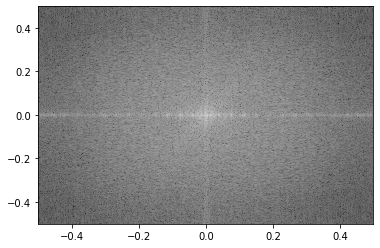

In [38]:
num_rows, num_cols = img.shape
img_padded = np.pad(img, ((0, num_rows), (0, num_cols)), mode='constant', constant_values=0)

Fimg = fft2(img_padded)
freq_row = fftfreq(2*num_rows)
freq_col = fftfreq(2*num_cols)

# Correcao da posicao das frequencias
Fimg = fftshift(Fimg)
freq_col = fftshift(freq_col)
freq_row = fftshift(freq_row)

#plt.imshow(np.log(np.abs(Fimg)), 'gray')
plt.pcolormesh(freq_col, freq_row, np.log(np.abs(Fimg)), cmap='gray')

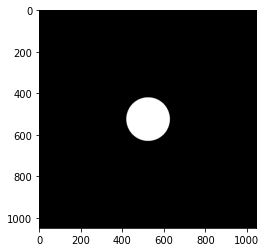

In [39]:
def filtro_passa_baixa_ideal(img, radius):
  num_rows, num_cols = img.shape
  freq_row = fftfreq(num_rows)
  freq_row = fftshift(freq_row)
  freq_col = fftfreq(num_cols)
  freq_col = fftshift(freq_col)
  
  low_pass_filter = np.zeros((num_rows, num_cols))
  
  for row in range(num_rows):
    for col in range(num_cols):
      distance = np.sqrt(freq_row[row]**2 + freq_col[col]**2)
      
      if distance <= radius:
        low_pass_filter[row, col] = 1
  
  return low_pass_filter

lp_filter = filtro_passa_baixa_ideal(img_padded, radius = 0.1)

plt.imshow(lp_filter, 'gray') 

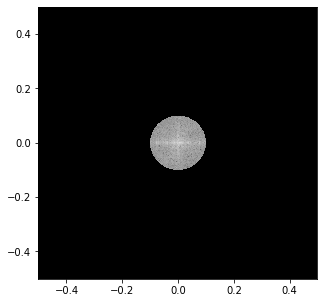

In [40]:
Fimg_filtered = lp_filter * Fimg

plt.figure(figsize=[5,5])
plt.pcolormesh(freq_col, freq_row, np.log(np.abs(Fimg_filtered) + 1), cmap='gray')

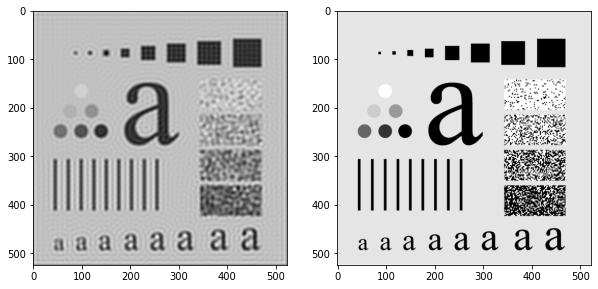

In [41]:
Fimg_filtered = fftshift(Fimg_filtered)

img_filtered = ifft2(Fimg_filtered)
img_filtered = np.real(img_filtered)
img_filtered = img_filtered[0:num_rows, 0:num_cols]


plt.figure(figsize=[10,10])
plt.subplot(1, 2, 1)
plt.imshow(img_filtered, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(img, 'gray')

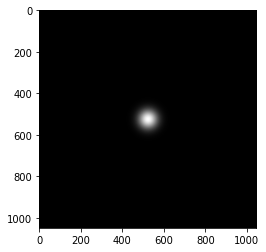

In [42]:
def filtro_passa_baixa_gaussian(img, sigma_r, sigma_c):
  num_rows, num_cols = img.shape
  freq_row = fftfreq(num_rows)
  freq_row = fftshift(freq_row)
  freq_col = fftfreq(num_cols)
  freq_col = fftshift(freq_col)
  
  low_pass_filter = np.zeros((num_rows, num_cols))
  
  for row in range(num_rows):
    for col in range(num_cols):
      expoent = (freq_row[row]**2/(2*sigma_r**2) + 
                 freq_col[col]**2/(2*sigma_c**2))

      low_pass_filter[row, col] = np.exp(-expoent)
      
  return low_pass_filter

lp_filter = filtro_passa_baixa_gaussian(img_padded, sigma_r = 0.03, sigma_c = 0.03)

plt.imshow(lp_filter, 'gray')

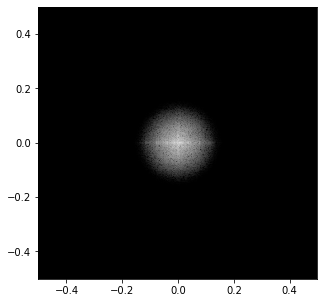

In [43]:
Fimg_filtered = lp_filter * Fimg

plt.figure(figsize=[5,5])
plt.pcolormesh(freq_col, freq_row, np.log(np.abs(Fimg_filtered) + 1), cmap='gray')

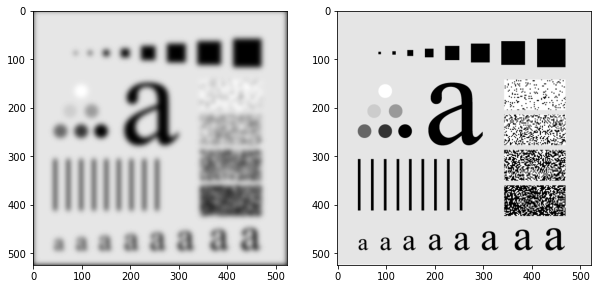

In [44]:
Fimg_filtered = fftshift(Fimg_filtered)

img_filtered = ifft2(Fimg_filtered)
img_filtered = np.real(img_filtered)
img_filtered = img_filtered[0:num_rows, 0:num_cols]


plt.figure(figsize=[10,10])
plt.subplot(1, 2, 1)
plt.imshow(img_filtered, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(img, 'gray')

In [47]:
def filtro_passa_alta_gaussiano(img, sigma_r, sigma_c):
  return 1 - filtro_passa_baixa_gaussian(img, sigma_r, sigma_c)

hp_filter = filtro_passa_alta_gaussiano(img_padded, sigma_c=0.1, sigma_r=0.1)

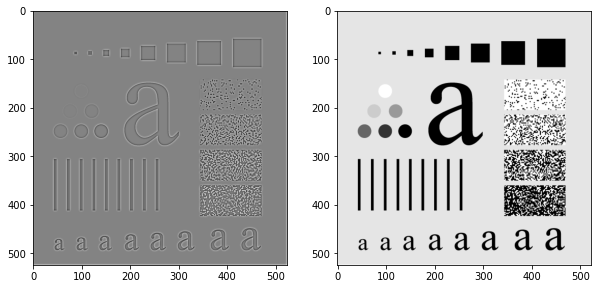

In [48]:
Fimg_filtered = hp_filter * Fimg
Fimg_filtered = fftshift(Fimg_filtered)

img_filtered = ifft2(Fimg_filtered)
img_filtered = np.real(img_filtered)
img_filtered = img_filtered[0:num_rows, 0:num_cols]


plt.figure(figsize=[10,10])
plt.subplot(1, 2, 1)
plt.imshow(img_filtered, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(img, 'gray')

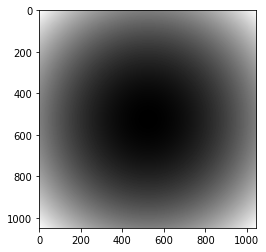

In [49]:
def filtro_laplaciano(img):
  num_rows, num_cols = img.shape
  freq_row = fftfreq(num_rows)
  freq_row = fftshift(freq_row)
  freq_col = fftfreq(num_cols)
  freq_col = fftshift(freq_col)
  
  laplacian_filter = np.zeros((num_rows, num_cols))
  
  for row in range(num_rows):
    for col in range(num_cols):
      laplacian_filter[row, col] = 4*np.pi*(freq_row[row]**2 + 
                                            freq_col[col]**2)
  
  return laplacian_filter

lap_filter = filtro_laplaciano(img_padded)
plt.imshow(lap_filter, 'gray')

In [50]:
filt = np.array([
  [ 1,  4,  8, 10,  8,  4, 1],
  [ 4, 12, 23, 30, 23, 12, 4],
  [ 8, 23, 45, 55, 45, 23, 8],
  [10, 30, 55, 70, 55, 30, 10],
  [ 8, 23, 45, 55, 45, 23, 8],
  [ 4, 12, 23, 30, 23, 12, 4],
  [ 1,  4,  8, 10,  8,  4, 1]
])
filt = filt/filt.sum()

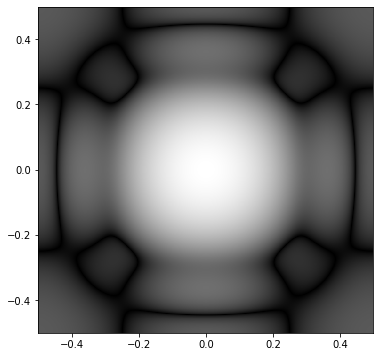

In [53]:
img = plt.imread('Imgs/test_image.tiff')

num_rows, num_cols = img.shape
img_padded = np.pad(img, ((0, num_rows), (0, num_cols)),
                    mode = 'constant', constant_values=0)

filt_img = np.zeros((2*num_rows, 2*num_cols))
filt_img[num_rows-3:num_rows+4, num_cols-3:num_cols+4] = filt

filt_img = fftshift(filt_img)
Ffilt = fft2(filt_img)
freq_r = fftfreq(2 * num_rows)
freq_c = fftfreq(2 * num_cols)

Ffilt = fftshift(Ffilt)
freq_r = fftshift(freq_r)
freq_c = fftshift(freq_c)

plt.figure(figsize=[6,6])
plt.pcolormesh(freq_c, freq_r, np.log(np.abs(Ffilt) + 1), cmap='gray')

